<h3>Importing Libraries</h3>

In [173]:
#Numpy for array/list based numerical operations.
import numpy as np

#Pandas for Tabular data analysis and manipulation
import pandas as pd

#Matplotlib and Seaborn for Graphs/Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings to handles warning.
import warnings
warnings.filterwarnings('ignore')

<h3>Importing Data File</h3>

In [174]:
#Reading csv file
lendingData = pd.read_csv("data\\loan.csv", header=0)
#checking first 10 rows of dataframe
lendingData.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<h3>Checking Shape</h3>

In [175]:
#Checking Shape/Dimenson
lendingData.shape

(39717, 111)

Data File is having </br>
Rows = 39717 </br>
Columns = 111

<h2> Data Cleaning Process </h2>

 <h3> Let's check Null Values/Column</h3>

In [176]:
#usnull function help us to have details about number of null values in each columns
lendingData.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<h4>Observation</h4>
<p>We can see there are lots of column which are having most of the data rows as null/NaN values.</br>
Let's remove those columns which is having more than 90% rows as null values</br>
Assumption: Column with 90% null value won't help us in Data Analysis and Visualization Process</p>

In [177]:
#Extract Columns which is having more than 90% data rows as Null
Columns_with_90Percent_Null_Values = lendingData.columns[lendingData.isnull().sum()/len(lendingData) > .90]
Columns_with_90Percent_Null_Values

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

<h3> Removing Columns which are having more than 90% data rows as null</h3>

In [178]:
#Dropping columns which is having more than 90% null data rows
lendingData.drop(Columns_with_90Percent_Null_Values, axis = 1, inplace = True)

In [179]:
#Checking our Dataframe shape again
lendingData.shape

(39717, 55)

In [180]:
#Checking again if still there are null values column or columns which can be of no use for our analysis
lendingData.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B  

<h4>Obesrvation:</h4>
<p>Still seems there are few columns which is either having value as zero (0.0) or single value only or null</br>
Let's find these columns and remove them as these are not going to add any value in our analysis</p>

In [181]:
#Pandas provide a method nunique which you can use to find unique values across column.
#We are putting condition to find out those columns which is having only single unique values in all rows (except null values).
columns_with_single_Value_only = lendingData.columns[lendingData.nunique() <= 1]
columns_with_single_Value_only

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

<p>Before removing lets cross check if any column value can impact our analysis or not</p>

In [182]:
lendingData.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [183]:
lendingData.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [184]:
lendingData.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [185]:
lendingData.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [186]:
lendingData.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [187]:
lendingData.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [188]:
lendingData.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [189]:
lendingData.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [190]:
lendingData.columns[lendingData.nunique() <= 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [191]:
#lets remove these columns
lendingData.drop(columns_with_single_Value_only, axis=1, inplace=True)

In [192]:
#Checking our Dataframe shape again
lendingData.shape

(39717, 46)

In [193]:
#Checking again if still there are null values column or columns which can be of no use for our analysis
lendingData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [194]:
lendingData.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal 

<h4>Observation</h4>
<p>desc and mths_since_last_delinq having more than 50% missing value.</br>
Let's Remove desc and mths_since_last_delinq coulmns</p>

In [195]:
lendingData.drop(['desc', 'mths_since_last_delinq'], inplace=True, axis=1)

In [196]:
lendingData.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prnc

In [197]:
#let's See what data we have now
lendingData.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


<h2>Data Columns Categorization</h2>
<p>Broadly there are 3 Categorization of Data</br>
Category 1 - Loan Applicant demographic Data (e.g Age, Address)</br>
Category 2 - Loan Specific Data (e.g. Loan Amount, Rate_Of_Interest)</br>
Category 3 - Customer behaviour (e.g. revolving balance, next payment date)</br>

<h2>Observation</h2>
Category 3 Data basically shows attributes which is representing data once Loan is approved but here we are interested only on those attributes which is available During loan Approval Process</p>

In [198]:
##Lets prepare a list of Customer Behavioural Data Columns.
Customer_Behaviour_Data_Columns =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [199]:
##Lets REMOVE Customer Behavioural Data Columns
lendingData.drop(Customer_Behaviour_Data_Columns, axis=1, inplace=True)

<h2>Observation</h2>
<p> There are columns which is not going to help in doing Defaulter Analysis<p>
    <ol>
        <li>title</li>
        <li>url</li>
        <li>zip code</li>
        <li>addr state</li>
    </ol>

In [200]:
#Lets Remove these unnecessary columns (title, url, zip_code, addr_state)
lendingData.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1, inplace=True)

<h3> Data Type Analysis & Conversion </h3>

In [201]:
lendingData.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,5.35,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,5.55,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,18.08,0.0


In [202]:
lendingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

<h3>Observation</h3>
int_rate Column is having % symbol. Lets remove % symbol

In [203]:
#removing '%' from int_rate value
lendingData['int_rate'] = lendingData.int_rate.str.replace('%','').astype(float)

<h3>Observation</h3>
issue_d Column is having dates. Lets convert it into dates

In [204]:
#Converting issue_d Column values into date format
lendingData['issue_d'] = pd.to_datetime(lendingData.issue_d, format='%b-%y')

In [205]:
lendingData.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
39707,92666,92661,5000,5000,525.0,36 months,9.33,159.77,B,B3,Stark and Roth Inc,2 years,MORTGAGE,180000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,11.93,NaN
39708,92552,92542,5000,5000,375.0,36 months,9.96,161.25,B,B5,Millenium Group,4 years,MORTGAGE,48000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,8.03,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22,164.23,C,C4,Self-Employeed,< 1 year,OWN,80000.0,Not Verified,2007-07-01,Fully Paid,credit_card,1.21,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43,155.38,A,A2,Rush Univ Med Grp,1 year,OWN,85000.0,Not Verified,2007-07-01,Fully Paid,credit_card,0.31,NaN
39711,92402,92390,5000,5000,700.0,36 months,8.70,158.30,B,B1,"A. F. Wolfers, Inc.",5 years,MORTGAGE,75000.0,Not Verified,2007-07-01,Fully Paid,credit_card,15.55,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,11.33,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,6.40,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,2.30,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,3.72,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,2007-06-01,Fully Paid,debt_consolidation,14.29,NaN


<h3>Derived Variable/Columns</h3>
<p> We can have Ratio column which will show ratio between Loan Amount Requested and Loan Amount Funded (Loan Amount Approved by Bank)

In [206]:
lendingData['funded_vs_requested_loanAmount_ratio'] = round(lendingData.funded_amnt_inv*100/lendingData.loan_amnt,2)
lendingData['funded_vs_requested_loanAmount_ratio'].head()

0     99.5
1    100.0
2    100.0
3    100.0
4    100.0
Name: funded_vs_requested_loanAmount_ratio, dtype: float64

<h3>Univariate Analysis - Numerical Data</h3>

Analysis 1 : Loan Amount

Text(0.5, 1.0, 'Loan Amount Requested')

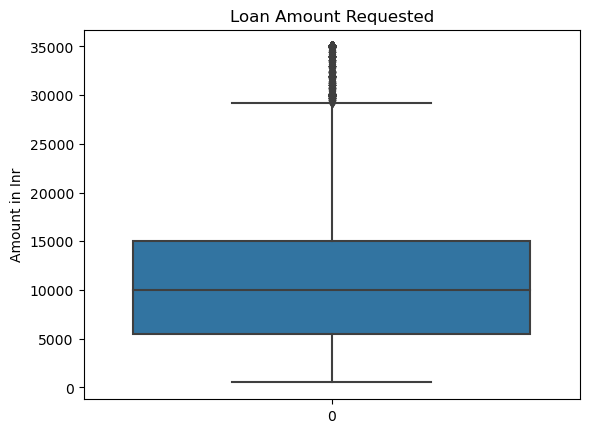

In [207]:
sns.boxplot(data=lendingData['loan_amnt'])
plt.ylabel("Amount in Inr")
plt.title('Loan Amount Requested')

<h3>Observation : Loan Amount</h3>
    <li>Median of loan Amount Requested is 10000</li>
    <li>There are very few peole who have requested Loan amount more than 30000</li>

<h3>Univariate Analysis - Numerical Data</h3>

Analysis 2 : Loan Amount Requested vs Loan Amount Funded Ratio

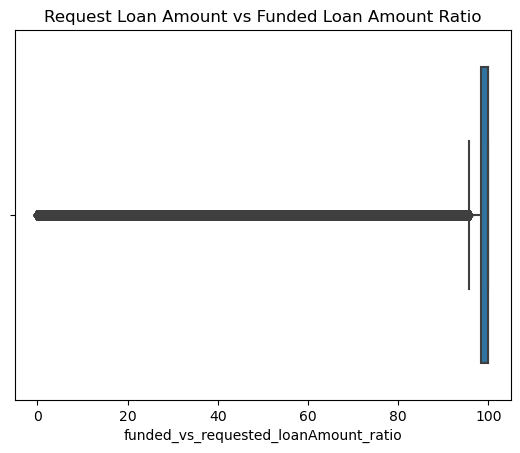

In [208]:
sns.boxplot(lendingData['funded_vs_requested_loanAmount_ratio'])
plt.title('Request Loan Amount vs Funded Loan Amount Ratio')
plt.show()

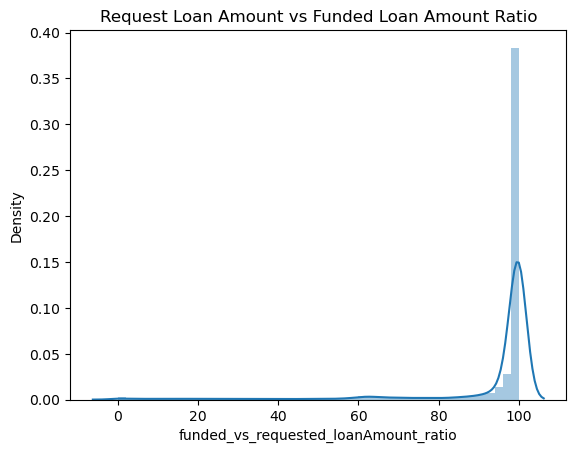

In [209]:
sns.distplot(a=lendingData.funded_vs_requested_loanAmount_ratio)
plt.title('Request Loan Amount vs Funded Loan Amount Ratio')
plt.show()

<h3>Observation : Request Loan Amount vs Funded Loan Amount Ratio</h3>
<li>Approximately 75% people get 100% Loan Amoaunt approved from  bank as compare to Loan Amount they requested</li>

<h3>Univariate Analysis - Categorical Values Analysis</h3>

Analysis 1 : Fully Paid vs Charged Off

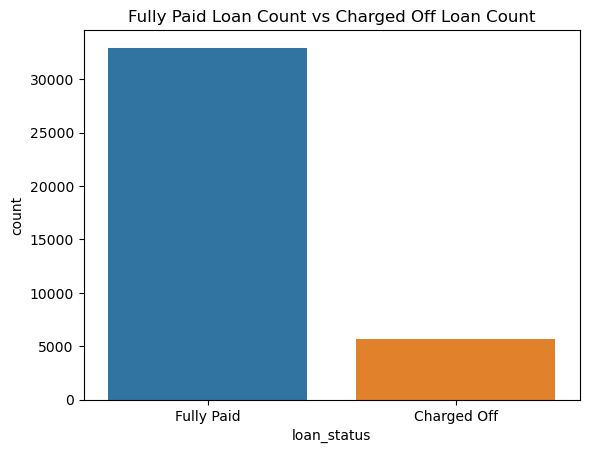

In [210]:
sns.countplot(x = 'loan_status', data = lendingData[(lendingData.loan_status !='Current')])
plt.title('Fully Paid Loan Count vs Charged Off Loan Count')
plt.show()

<h3>Univariate Analysis - Categorical Values Analysis</h3>
Analysis 2 : Home Ownership

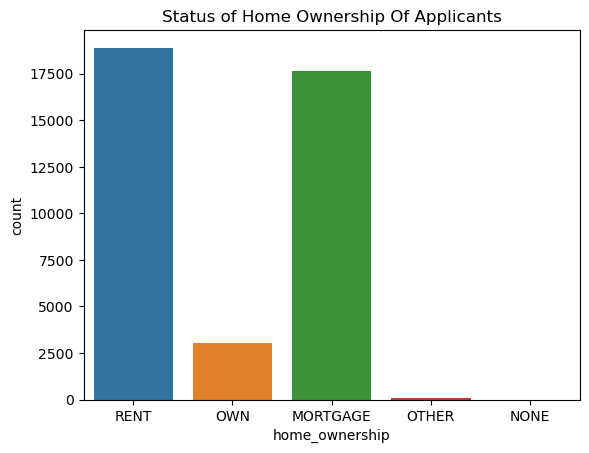

In [211]:
sns.countplot(x = 'home_ownership', data = lendingData)
plt.title('Status of Home Ownership Of Applicants')
plt.show()

<h3>Univariate Analysis - Categorical Values Analysis</h3>
Analysis 3 : Loan Purpose

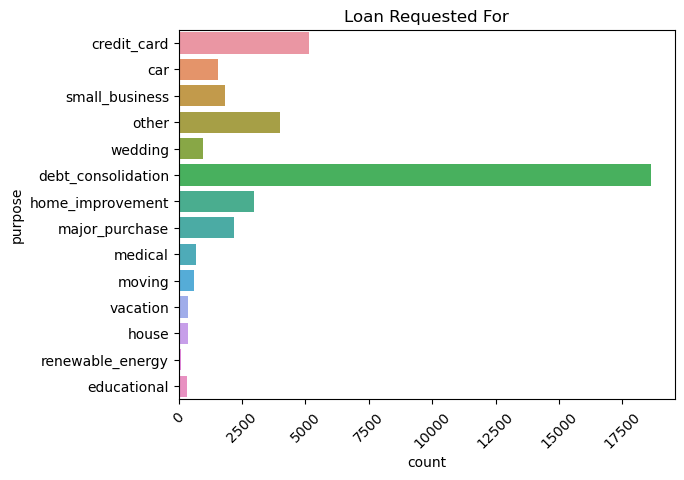

In [212]:
sns.countplot(y = 'purpose', data = lendingData)
plt.title('Loan Requested For')
plt.xticks(rotation=45)
plt.show()

<h3>Univariate Analysis - Categorical Values Analysis</h3>
Analysis 4 : Grade

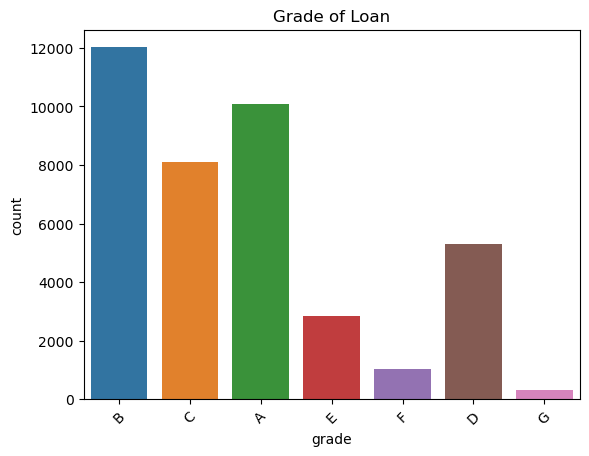

In [213]:
sns.countplot(x = 'grade', data = lendingData)
plt.title('Grade of Loan')
plt.xticks(rotation=45)
plt.show()

<h2>Analyzing Charged Off Loan Against Various Columns </h2>

<h3>1 - Loan Purpose</h3>

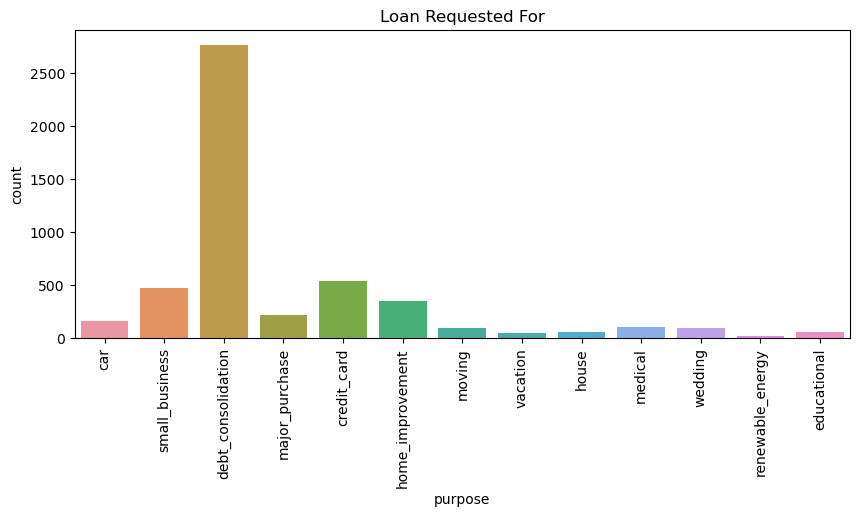

In [214]:
plt.figure(figsize=(10,4))
sns.countplot(data =lendingData[(lendingData['loan_status'] == 'Charged Off') & (lendingData['purpose'] != 'other')], x='purpose')
plt.xticks(rotation=90)
plt.title('Loan Requested For')
plt.show()

<h3>Observation - Top 3 Loan Purpose which are highly probable for Charged Off </h3>
<li>Debt Consolidation</li>
<li>Credit Card</li>
<li>Small Business</li>

<h2>Analyzing Charged Off Loan against Interest Rates </h2>
<h3>2 - Interest Rate</h3>

In [215]:
##First let's Create a Range Column for Interest Rates
lendingData['int_rate_category'] = pd.cut(lendingData['int_rate'], bins=4,precision =0,labels=['5%-9%','10%-14%','15%-19%','20%-25%'])

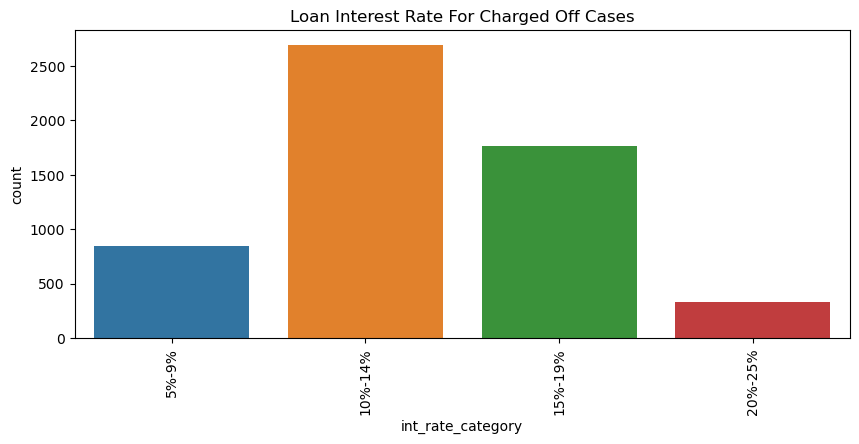

In [216]:
plt.figure(figsize=(10,4))
sns.countplot(data =lendingData[(lendingData['loan_status'] == 'Charged Off')], x='int_rate_category')
plt.xticks(rotation=90)
plt.title('Loan Interest Rate For Charged Off Cases')
plt.show()

<h3>Observation</h3>
<li>Maximum Charged Off cases were having High Interest Rate Loan</li>

<h2>Analyzing Charged Off Loan against Terms</h2>
<h3>3 - Terms</h3>

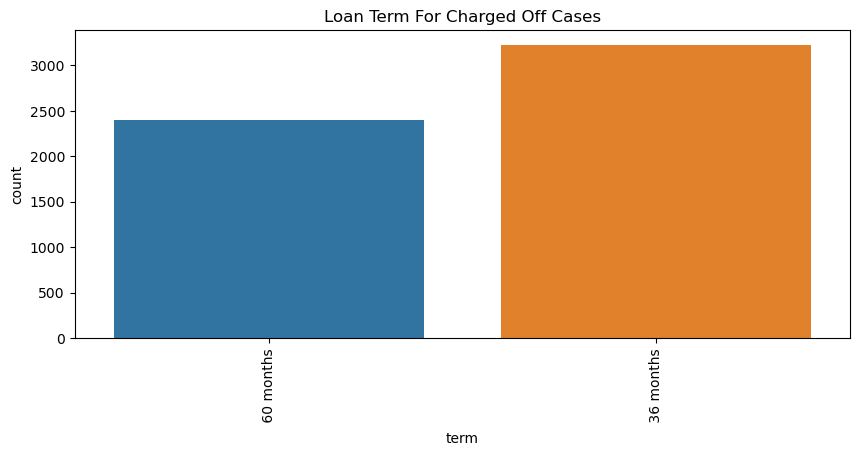

In [217]:
plt.figure(figsize=(10,4))
sns.countplot(data =lendingData[(lendingData['loan_status'] == 'Charged Off')], x='term')
plt.xticks(rotation=90)
plt.title('Loan Term For Charged Off Cases')
plt.show()

<h3>Observation</h3>
<li>36 Month Loan Term is having More Charged Off Cases than 60 Months Term</li>

<h2>Analyzing Charged Off Loan against Home Ownership </h2>
<h3>4 - Home Ownership Status of Applicant</h3>

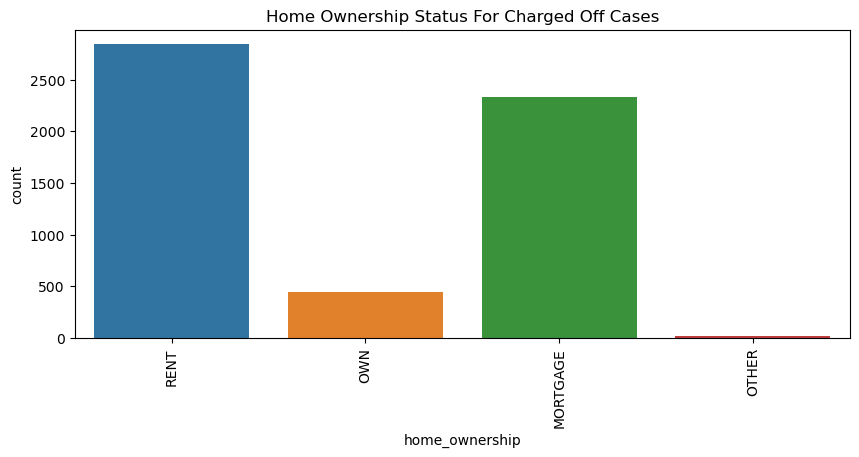

In [218]:
plt.figure(figsize=(10,4))
sns.countplot(data =lendingData[(lendingData['loan_status'] == 'Charged Off')], x='home_ownership',)
plt.xticks(rotation=90)
plt.title('Home Ownership Status For Charged Off Cases')
plt.show()

<h3>Observation</h3>
<li>Loan Applicant with Home ownership Status as 'RENT' or 'MORTGAGE' having HIGH probability to be Charged Off</li>

<h2> Bivariate Analysis </h2>
<h3>Analysis 1- Loan Status vs Annual Income </h3>

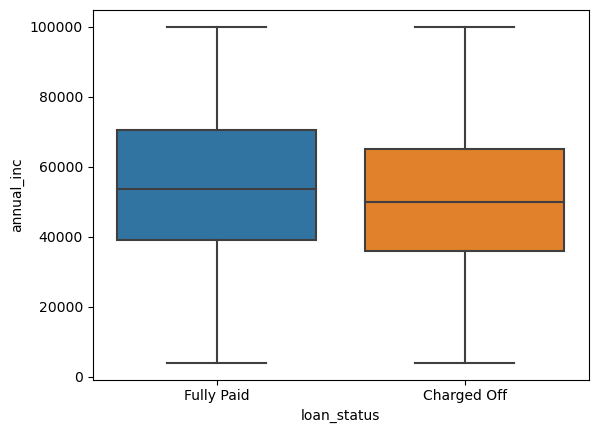

In [219]:
sns.boxplot(x='loan_status', y='annual_inc', data=lendingData[(lendingData['annual_inc']<=100000) & (lendingData['loan_status'] != 'Current')])
plt.show()

<h3>Observation</h3>
<li>Median Income is Low for Charged Off cases than the non Charged off cases</li>

<h2> Bivariate Analysis </h2>
<h3>Analysis 2- Loan Status vs Loan Interest Rate </h3>

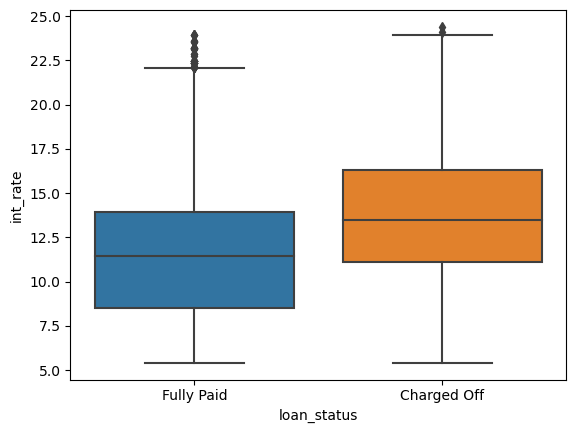

In [220]:
sns.boxplot(x='loan_status', y='int_rate', data=lendingData[(lendingData['annual_inc']<=100000) & (lendingData['loan_status'] != 'Current')])
plt.show()

<h3>Observation</h3>
<li>High Interest Leads to more Charged Off cases than Low Interest Rates</li>

<h2>Finding Correlation Among the Variables</h2>

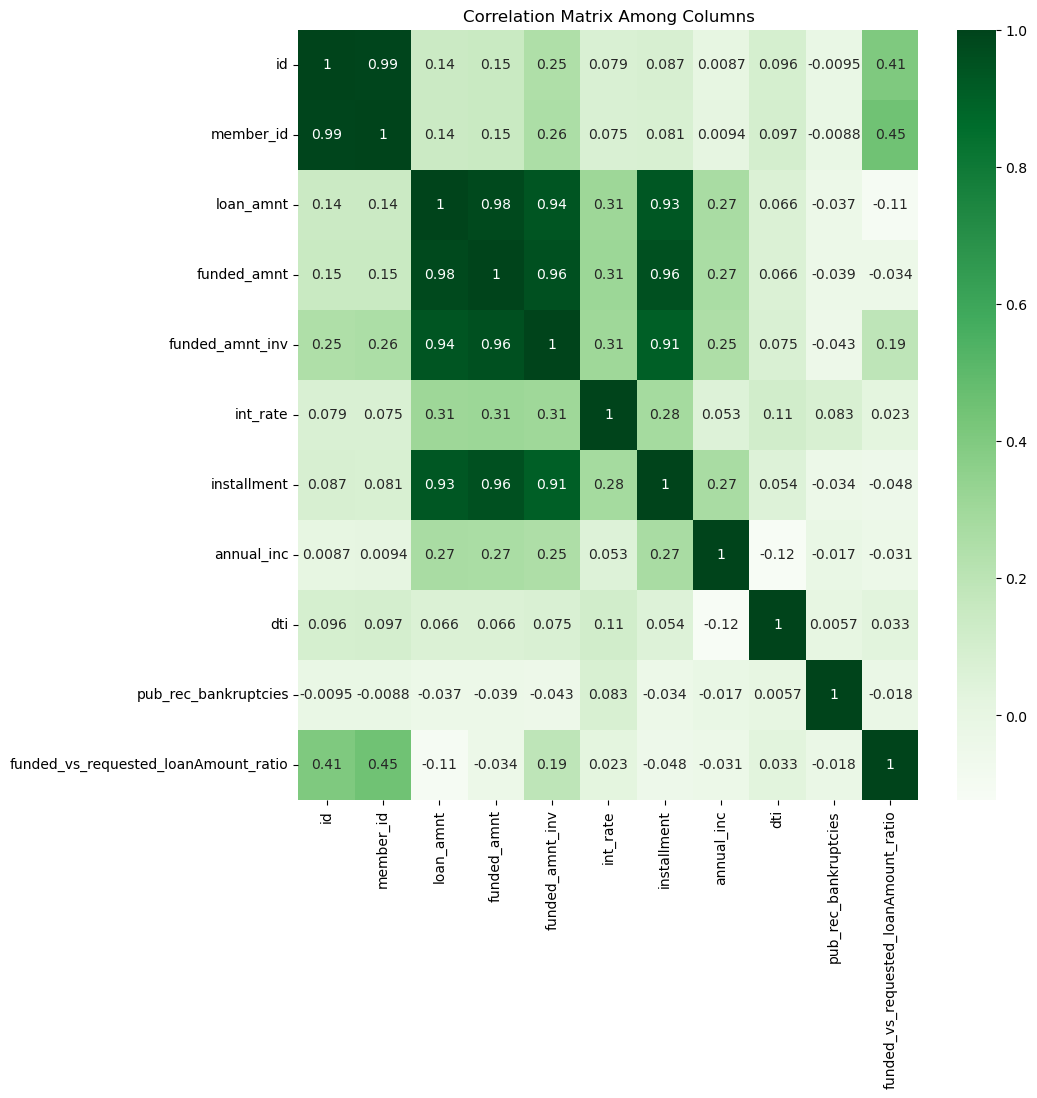

In [221]:
correlation_matrix = lendingData[(lendingData['loan_status'] == 'Charged Off')].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix, annot = True, cmap='Greens')
plt.title("Correlation Matrix Among Columns")
plt.show()

<h3>Observation</h3>
<li>A High Correlation between Loan Requested & Loan Approved (Funded) by bank</li>
<li>A High Correlation between Installment & Loan Approved (Funded) by bank</li>

<hr>
<h2> Lending Club Case Study : Conclusion </h2>
<hr>
<h3> Analysis : Loan Status Analysis </h3>
<ol>
    <li>Approx 85-86% Loan Applicant has Fully Paid their loan.</li>
    <li>Approx 14-15% Loan has been charged-off.</li>
</ol>

<h3> Analysis : Loan Status (Charged-Off) vs Annual Income of Applicant </h3>
<ol>
    <li>Average Annual Income of Charged-Off loan Applicant’s is less than Fully-Paid Loan Applicants.</li>
    <li>Average Annual Income for Charged-off Loan Applicant’s is below 50K INR.</li>
</ol>

<h3> Analysis : Loan Status (Charged-Off) vs Loan Purpose </h3>
<h5>Top 3 Loan Purpose which are highly probable for Charged Off use case are</h5>
<ol>
    <li>Debt Consolidation</li>
    <li>Credit Card</li>
    <li>Small Buiness</li>
</ol>

<h3> Analysis : Loan Status (Charged-Off) vs Loan Interest Rate </h3>
<h5>Majority of Charged-Off cases were falling in the following range of Interest Rates:</h5>
<ol>
    <li>10% - 14%</li>
    <li>15% - 19%</li>
</ol>

<h3> Analysis : Loan Status (Charged-Off) vs Loan Term/Tenure </h3>
<ol>
    <li>36 Months Term Loan is having more chances to be Charged-off cases than 60 Months Term Loan.</li>
</ol>

<h3> Analysis : Loan Status (Charged-Off) vs Home Ownership of Loan Applicant </h3>
<ol>
    <li>Loan Applicant which own the houses are least prone to be Charged-Off.</li>
    <li>Loan Applicant’s who are having ‘Rented House’ or ‘Mortgage’ are more prone to be Charged-off cases.</li>
</ol>